In [1]:
import os
import glob
import torch
import numpy as np


from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset

/Users/samik/miniconda3/envs/test_env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))  #scanning through all the files within a folder
#/../..abcde.png -> [['a','b','c','d','e']]
targets_org = [x.split("/")[-1][:-4] for x in image_files]
#abcde - > [a,b,c,d,e]
targets = [[c for c in x] for x in targets_org]
targets_flat = [c for clist in targets for c in clist]  #flattening the list
#converting a multi dimensional list to a single dimensional list before encoding it 

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(targets_flat)

target_encoded =[label_encoder.transform(x) for x in targets]
target_encoded = np.array(target_encoded)+1
#print(target_encoded)
print("\n")
#print(len(label_encoder.classes_))  #we have 19 different label encoded classes
#print(targets)
print("\n")
#print(np.unique(targets_flat))


#NOW SPLITTING THE DATA
train_images, test_images, train_targets, test_targets, train_orig_targets, test_orig_targets = model_selection.train_test_split(
    image_files,
    target_encoded,
    targets_org,
    test_size=0.1,
    random_state= 42
)

train_dataset = dataset.Classification(
    image_paths = train_images, 
    targets = train_targets, 
    resize=(config.IMAGE_HEIGHT,config.IMAGE_WIDTH)
)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = config.BATCH_SIZE,
    num_workers=  config.NUM_WORKERS,
    shuffle = True
)

In [4]:
train_dataset[0]

{'images': tensor([[[1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
          [1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
          [1.1700, 1.1700, 1.1700,  ..., 2.1804, 2.1804, 2.1804],
          ...,
          [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318],
          [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318],
          [1.2214, 1.2214, 1.2214,  ..., 2.2318, 2.2318, 2.2318]],
 
         [[1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
          [1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
          [1.3256, 1.3256, 1.3256,  ..., 2.3585, 2.3585, 2.3585],
          ...,
          [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111],
          [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111],
          [1.3782, 1.3782, 1.3782,  ..., 2.4111, 2.4111, 2.4111]],
 
         [[1.5420, 1.5420, 1.5420,  ..., 2.5703, 2.5703, 2.5703],
          [1.5420, 1.5420, 1.5420,  ..., 2.5703, 2.5703, 2.5703],
          [1.5420, 1.5420, 1.5

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
npimg = train_dataset[0]["images"].numpy()

In [7]:
npimg.shape

(3, 75, 300)

In [8]:
np.transpose(npimg,(1,2,0)).shape  #converting the image back into height, width , channel

(75, 300, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


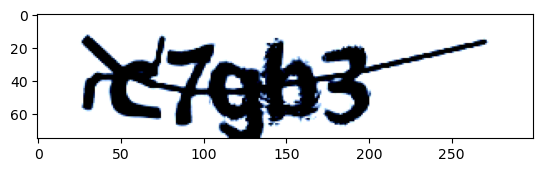

In [13]:
plt.imshow(np.transpose(npimg,(1,2,0)))